In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
img = cv2.imread("/content/drive/MyDrive/IMAGES/IMAGES_FEC/train/1/1073.jpg") 

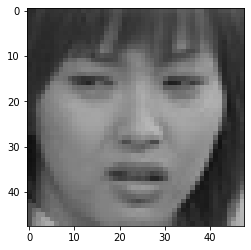

In [ ]:
plt.imshow(img)

In [ ]:
dataDirectory = "/content/drive/MyDrive/IMAGES/IMAGES_FEC/train" # training images are saved in dataDirectory

In [ ]:
classes = ["0","1","2","3","4","5","6"] #0-angry 1-disgust 2-fear 3-happy 4-neutral 5-sad 6-surprise

In [ ]:
img_size = 224 ## Imagenet --> 224 x 224

**read all the images and convert it to an array**

In [ ]:
training_data = [] #data array

def create_training_data():
    for category in classes:
        path = os.path.join(dataDirectory , category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path , img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                    pass
    file_name = "/content/drive/MyDrive/IMAGES/IMAGES_FEC/image_d.pkl"
    open_file = open(file_name, "wb")
    pickle.dump(training_data, open_file)
    open_file.close()

In [ ]:
create_training_data()

In [ ]:
training_data = []
file_name = "/content/drive/MyDrive/IMAGES/IMAGES_FEC/image_data_FINAL.pkl"

open_file = open(file_name, "rb")
training_data = pickle.load(open_file)
open_file.close()

In [ ]:
#print(len(training_data))
print(len(training_data))

57944


In [ ]:
import random 
random.shuffle(training_data) #for making the model more dynamic

In [ ]:

X = [] #data
Y = [] #lable
#x_test = []
#y_test = []

for data,lable in training_data:
    X.append(data)
    #x_test.append(data)
    Y.append(lable)
    #y_test.append(lable)

    
X = np.array(X).reshape(-1, img_size ,img_size ,3) #we need 4 dimesions
#x_test = np.array(x_test).reshape(-1, img_size ,img_size ,3)

In [ ]:
X = X/255.0   #normalizing the data

In [ ]:
X.shape

(57944, 224, 224, 3)

In [ ]:
Y = np.array(Y)

In [ ]:
Y.shape

(57944,)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# MobileNet-v2 is a convolutional neural network that is 53 layers deep.
# This network trained on more than a million images from the ImageNet database
# The pretrained network can classify images into 1000 object categories,
model = tf.keras.applications.MobileNetV2()  #pre-trained model

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

**transfer learning -Tuning, weights will start from last checkpoint**

In [ ]:
base_input = model.layers[0].input #input to our model

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output)  #adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) #activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation ='softmax')(final_output) #we are classifing 7 classes

In [ ]:
final_output #output of our model

In [ ]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss = "sparse_categorical_crossentropy" ,optimizer ="adam", metrics =["accuracy"])

In [ ]:
new_model.fit(X,Y , epochs =50)

Epoch 1/50
1811/1811 [==============================] - 299s 153ms/step - loss: 1.1654 - accuracy: 0.5603
Epoch 2/50
1811/1811 [==============================] - 278s 153ms/step - loss: 0.9669 - accuracy: 0.6398
Epoch 3/50
1811/1811 [==============================] - 278s 153ms/step - loss: 0.8622 - accuracy: 0.6815
Epoch 4/50
1811/1811 [==============================] - 281s 155ms/step - loss: 0.7587 - accuracy: 0.7211
Epoch 5/50
1811/1811 [==============================] - 278s 154ms/step - loss: 0.6582 - accuracy: 0.7607
Epoch 6/50
1811/1811 [==============================] - 278s 154ms/step - loss: 0.5544 - accuracy: 0.7999
Epoch 7/50
1811/1811 [==============================] - 278s 153ms/step - loss: 0.4603 - accuracy: 0.8356
Epoch 8/50
1811/1811 [==============================] - 280s 155ms/step - loss: 0.3778 - accuracy: 0.8666
Epoch 9/50
1811/1811 [==============================] - 278s 153ms/step - loss: 0.3172 - accuracy: 0.8880
Epoch 10/50
1811/1811 [=======================

In [ ]:
new_model.evaluate(x_test, y_test, batch_size=128)


In [ ]:
new_model.save('pro_model_full_50epoch_v1.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
new_model.save('/content/drive/MyDrive/IMAGES/IMAGES_FEC/pro_model_full_50epoch_v1.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
#Hierarchical Data Format 5. It is an open-source file which comes in handy to store large amount of data
new_model = tf.keras.models.load_model('/content/drive/MyDrive/IMAGES/IMAGES_FEC/pro_model_50epoch_v1.h5') 

In [ ]:
test_img = cv2.imread("/content/Rajesh1.jpg")

In [ ]:
test_img.shape

(353, 379, 3)

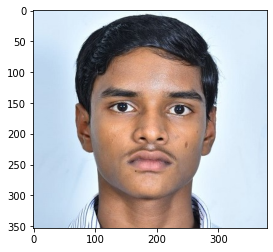

In [ ]:
#cv2. cvtColor() method is used to convert an image from one color space to another
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

**We need face detection algorithm**

In [ ]:
faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/IMAGES/IMAGES_FEC/facedetection_algorithm.xml')

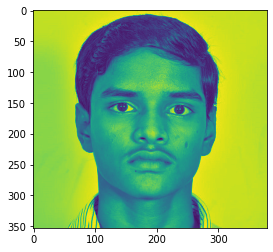

In [ ]:
gray = cv2.cvtColor(test_img , cv2.COLOR_BGR2GRAY) #BGR to GRAY color

plt.imshow(gray)

In [ ]:
gray.shape

(353, 379)

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = test_img[y:y+h, x:x+w]
    cv2.rectangle(test_img, (x,y), (x+w ,y+h), (255,0,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) ==0:
        print("face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

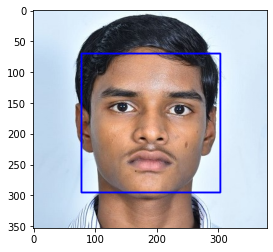

In [ ]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

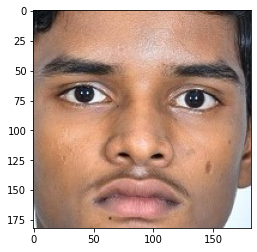

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis =0)#need 4th dimensions
final_image = final_image #normalization

In [ ]:
prediction = new_model.predict(final_image)

In [ ]:
prediction[0]

array([2.8838406e-04, 8.4453975e-05, 1.1766418e-01, 2.4035077e-04,
       9.2768213e-03, 1.3461668e-04, 8.7231123e-01], dtype=float32)

In [ ]:
result = np.argmax(prediction)
if(result == 0):
    print("angry")
elif(result == 1):
    print("disgust")
elif(result == 2):
    print("fear")
elif(result == 3):
    print("happy")
elif(result == 4):
    print("neutral")
elif(result == 5):
    print("sad")
elif(result == 6):
    print("surprise")
    

surprise


**REAL TIME FACE DETECTION**

In [ ]:
path = "facedetection_algorithm.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "some text in the box"
(text_width,text_height) = cv2.getTextSize(text,font,fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y),(text_offset_x+ text_width+2, text_offset_y - text_height -2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x, text_offset_y),font,fontScale = font_scale, color=(0,0,0),thickness=1)


cap = cv2.VideoCapture(0) # Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2. VideoCapture()
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read() 
    #eye_cascade = cv2. CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier('facedetection_algorithm.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade. empty())


    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face
    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis =0) ## need fourth dimension
    final_image=  final_image/255.0

    font = cv2. FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    if (np.argmax(Predictions)==0):
        status = "Angry"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle 
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)

        # Add text 
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax (Predictions) ==1):
        status = "Disgust"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions) == 2):
        status = "Fear"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255), 2, cv2.LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions) == 3):
        status = "Happy"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), CV2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255), 2, CV2.LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions) == 4):
        status = "Neutral"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        Cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255), 2, cv2.LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions) == 5):
        status = "Sad"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255), 2, cv2.LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions) == 6):
        status = "Surprise"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle 
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255), 2, cv2.LINE_4) 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    


##Model 2

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/IMAGES/FER-2103.zip', 'r') as zip_ref:
    zip_ref.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    
    zip_ref.extractall('/content/drive/MyDrive/IMAGES/IMAGE_FEC_2013')
    print('Done!')

In [ ]:
dataDirectory = "/content/drive/MyDrive/IMAGES/IMAGE_FEC_2013/train" # training images are saved in dataDirectory

In [ ]:
classes = ["0","1","2","3","4","5","6"] #0-angry 1-disgust 2-fear 3-happy 4-neutral 5-sad 6-surprise

In [ ]:
img_size = 224 ## Imagenet --> 224 x 224

**read all the images and convert it to an array**

In [ ]:
training_data = [] #data array

def create_training_data():
    for category in classes:
        path = os.path.join(dataDirectory , category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path , img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                    pass
    file_name = "/content/drive/MyDrive/IMAGES/IMAGE_FEC_2013/FEC_2013_image_data.pkl"
    open_file = open(file_name, "wb")
    pickle.dump(training_data, open_file)
    open_file.close()

In [ ]:
create_training_data()

In [ ]:
training_data = []
file_name = "/content/drive/MyDrive/IMAGES/IMAGE_FEC_2013/FEC_2013_image_data.pkl"
open_file = open(file_name, "rb")
training_data = pickle.load(open_file)
open_file.close()

In [ ]:
#print(len(training_data))
print(len(training_data))

28709


In [ ]:
import random 
random.shuffle(training_data) #for making the model more dynamic

In [ ]:

X = [] #data
Y = [] #lable
x_test = []
y_test = []

for data,lable in training_data:
    X.append(data)
    x_test.append(data)
    Y.append(lable)
    y_test.append(lable)

    
X = np.array(X).reshape(-1, img_size ,img_size ,3) #we need 4 dimesions
x_test = np.array(x_test).reshape(-1, img_size ,img_size ,3)

NameError: ignored

In [ ]:
X.shape

In [ ]:
Y = np.array(Y)

In [ ]:
Y.shape

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# MobileNet-v2 is a convolutional neural network that is 53 layers deep.
# This network trained on more than a million images from the ImageNet database
# The pretrained network can classify images into 1000 object categories,
model = tf.keras.applications.MobileNetV2()  #pre-trained model

In [ ]:
model.summary()

**transfer learning -Tuning, weights will start from last checkpoint**

In [ ]:
base_input = model.layers[0].input #input to our model

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output)  #adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) #activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation ='softmax')(final_output) #we are classifing 7 classes

In [ ]:
final_output #output of our model

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss = "sparse_categorical_crossentropy" ,optimizer ="adam", metrics =["accuracy"])

In [ ]:
new_model.fit(X,Y , epochs =30)
new_model.save('FEC_2013_Model.h5')

In [ ]:
new_model.evaluate(x_test, y_test, batch_size=128)


In [ ]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break27

cap.release()
cv2.destroyAllWindows()

OSError: ignored

####**Application 1**: Remote Class Student Emotional Review during class


#### 1.1 Extracting an Image for each 5 seconds from a Web Cam recording of a student during Online Lecture


In [ ]:
import cv2
time = 0
count = 0

while True:
    try:
        time = time + 5000
        count = count + 1 
        cap = cv2.VideoCapture('/content/drive/MyDrive/IMAGES/IMAGES_FEC/myvedio.mp4')
        cap.set(cv2.CAP_PROP_POS_MSEC,time)      # Go to the 1 sec. position
        ret,frame = cap.read()                  # Retrieves the frame at the specified second
        cv2.imwrite('/content/drive/MyDrive/IMAGES/IMAGES_FEC/Vedio_Images/image'+str(count)+'.jpg', frame)
    except Exception as e:
        break

#### 1.2 Applying prediction on all Images extracted


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#Hierarchical Data Format 5. It is an open-source file which comes in handy to store large amount of data
fer_model = tf.keras.models.load_model('/content/drive/MyDrive/IMAGES/IMAGES_FEC/pro_model_50epoch_v1.h5') 

faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/IMAGES/IMAGES_FEC/facedetection_algorithm.xml')

path = "/content/drive/MyDrive/IMAGES/IMAGES_FEC/Vedio_Images"

for img in os.listdir(path):
            
                sample_img = cv2.imread(os.path.join(path , img))
                gray_image = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY) #BGR to GRAY color
                
                faces = faceCascade.detectMultiScale(gray_image, 1.1,4)
                for x,y,w,h in faces:
                    roi_gray = gray_image[y:y+h, x:x+w]
                    roi_color = sample_img[y:y+h, x:x+w]
                    cv2.rectangle(sample_img, (x,y), (x+w ,y+h), (255,0,0,0), 2)
                    facess = faceCascade.detectMultiScale(roi_gray)
                    if len(facess) ==0:
                        print("face not detected")
                    else:
                        for (ex,ey,ew,eh) in facess:
                            face_roi = roi_color[ey: ey+eh, ex:ex+ew]
                final_image = cv2.resize(face_roi, (224,224))
                final_image = np.expand_dims(final_image, axis =0)
                prediction = fer_model.predict(final_image)
                result = np.argmax(prediction)
                print("The Person in the image is mostly likely to be in ", end = "")
                if(result == 0):
                    print("Angry")
                elif(result == 1):
                    print("Disgust")
                elif(result == 2):
                    print("Fear")
                elif(result == 3):
                    print("Happy")
                elif(result == 4):
                    print("Neutral")
                elif(result == 5):
                    print("Sad")
                elif(result == 6):
                    print("Surprise")


The Person in the image is mostly likely to be in Sad
The Person in the image is mostly likely to be in Neutral
The Person in the image is mostly likely to be in Sad
The Person in the image is mostly likely to be in Sad
The Person in the image is mostly likely to be in Sad
The Person in the image is mostly likely to be in Angry
The Person in the image is mostly likely to be in Angry
